# 朴素贝叶斯算法实例：文档分类

参考资料：

黄永昌《scikit-learn机器学习：常用算法原理及编程实战》

IDF：逆向文档频率指数。

## 下载数据集

In [2]:
%time
from sklearn.datasets import load_files

news_train = load_files(container_path='../input/mlcomp/379/train/')
news_test = load_files(container_path='../input/mlcomp/379/test/')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


In [3]:
dir(news_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [5]:
type(news_train.data)

list

In [6]:
news_train.data[0]

b'From: demon@desire.wright.edu (Not a Boomer)\nSubject: The real source of trouble in the US health care system\n\n\tCancel private health insurance?\n\n\tWhen government care that only covers 20% of the population consumes\n42% of the spending for health care?\n\n\tNOT!\n\n\tNational Health Expenditures: 1960 to 1990\n(Includes Puerto Rico and outlying areas.)\n\nYear\tHealth Services and Supplies ($billions)\n\tPrivate\t\tPublic\n====================================\n1960\t$19.8\t\t$5.7\t(22% of total)\n1970\t$44.1\t\t$24.9\t(56% of total)\n1980\t$140.7\t\t$98.1\t(41% of total)\n1990\t$374.8\t\t$268.6\t(42% of total)\n\n[Source: American Almanac, Page 97.  1992-3 Edition]\n\n\tNow you understand where most of that 12.2% of GNP is going--to waste.\n\n\tBy these figures, private insurance is spending 58% of the money to\ncover 4 times as many people.\n\n\tGo figure.\n\nBrett\n________________________________________________________________________________\n\t"There\'s nothing so passi

### 认识数据集

In [7]:
len(news_train.data)

13180

In [8]:
news_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
len(news_train.target_names)

20

In [10]:
news_train.target

array([18, 13,  1, ..., 14, 15,  4])

一共 13180 个文档， 20 个类别。

## 特征工程：把文字转换成数字矩阵

`TfidfVectorizer` 这个类的作用就是把文档转换成矩阵，矩阵的每一行表示原来的数据的一个文档，每一行的每个元素表示相应的词语的重要性。

In [11]:
%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform(news_train.data)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [25]:
vectorizer.get_feature_names()[-30:]

['zzneu',
 'zznki',
 'zznkj',
 'zznkjz',
 'zznkzz',
 'zzo',
 'zzr1100',
 'zzt',
 'zzy_3w',
 'zzz',
 'zzzoh',
 'zzzz',
 'zzzzzz',
 'zzzzzzt',
 'ªl',
 '³ation',
 'º_________________________________________________º_____________________º',
 'ºnd',
 'çait',
 'çon',
 'ère',
 'ée',
 'égligent',
 'élangea',
 'érale',
 'ête',
 'íålittin',
 'ñaustin',
 'ýé',
 'ÿhooked']

In [21]:
len(vectorizer.get_feature_names())

130274

In [17]:
X_train.toarray().shape

(13180, 130274)

## 模型训练

In [26]:
%time
from sklearn.naive_bayes import MultinomialNB

y_train = news_train.target
mnb = MultinomialNB(alpha=0.0001) # alpha 表示平滑参数，其值越小，越容易造成过拟合，值太大，容易造成欠拟合。
mnb.fit(X_train,y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

+ alpha 表示平滑参数，其值越小，越容易造成过拟合，值太大，容易造成欠拟合。

In [29]:
# 把测试数据集同样地，做特征工程，变成 tfidf 的矩阵
X_test = vectorizer.transform(news_test.data)
y_test = news_test.target

In [30]:
y_pred = mnb.predict(X_test)

### 模型评价

In [31]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score(y_test,y_pred)

0.9088172804532578

In [22]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.91      0.91       245
          1       0.80      0.90      0.85       298
          2       0.82      0.79      0.80       292
          3       0.81      0.80      0.81       301
          4       0.90      0.91      0.91       256
          5       0.88      0.88      0.88       297
          6       0.87      0.81      0.84       290
          7       0.92      0.93      0.92       324
          8       0.96      0.96      0.96       294
          9       0.97      0.94      0.96       315
         10       0.96      0.99      0.98       302
         11       0.95      0.96      0.95       297
         12       0.91      0.85      0.88       313
         13       0.96      0.96      0.96       277
         14       0.94      0.97      0.96       305
         15       0.93      0.96      0.94       293
         16       0.91      0.96      0.93       246
         17       0.96      0.98      0.97   

+ 通过混淆矩阵，可以看到每个类别被分错的情况。

In [32]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred)

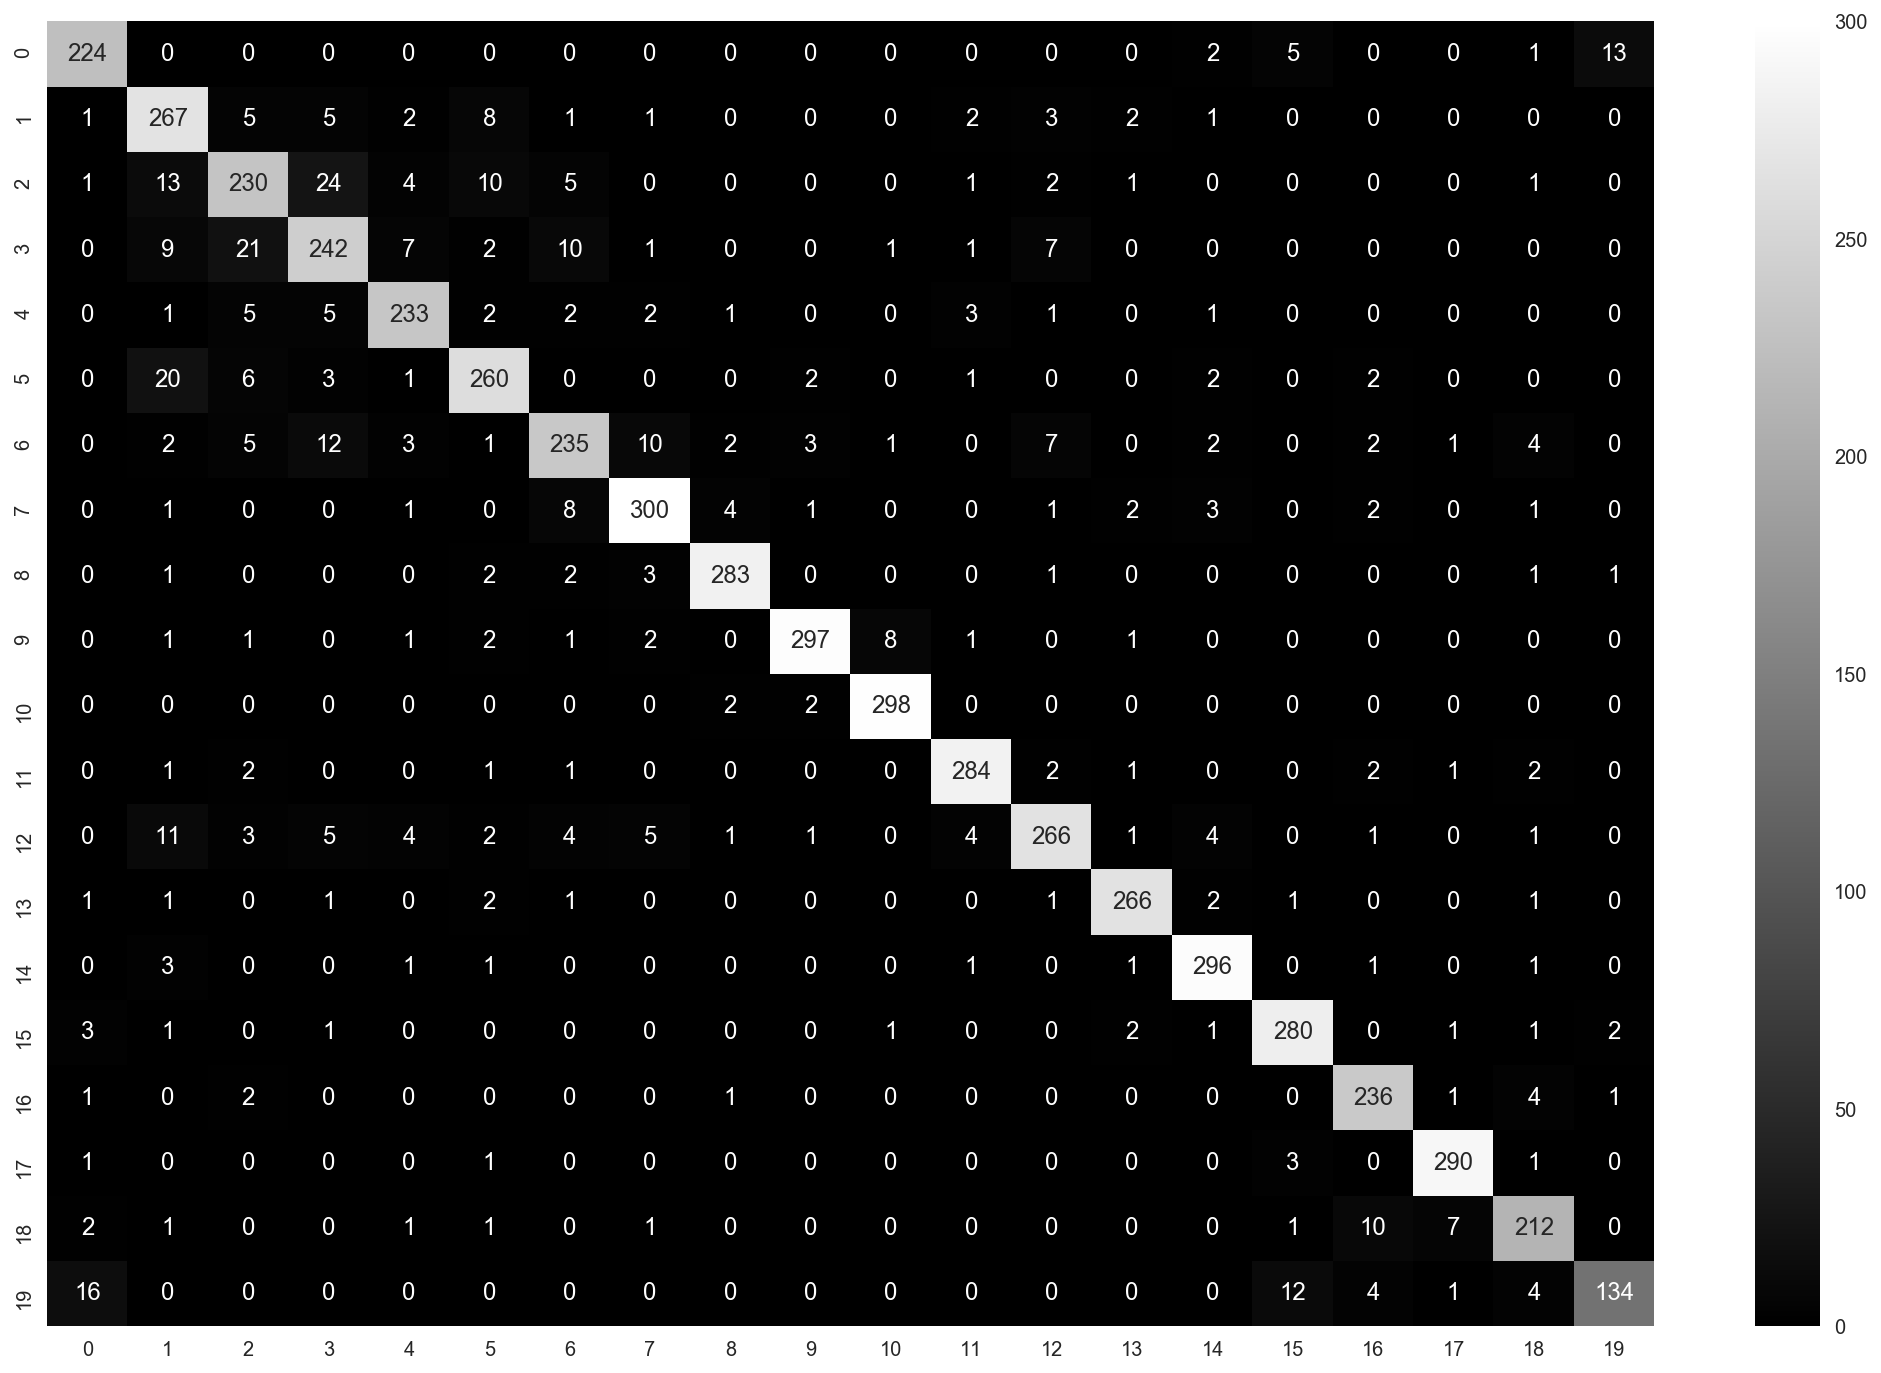

In [33]:
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.gray)
plt.show()

### 更清楚地看到哪些类别容易混淆。

In [27]:
# 把对掉线都弄成 0 ，不让他干扰我们
np.fill_diagonal(con_mat, 0)

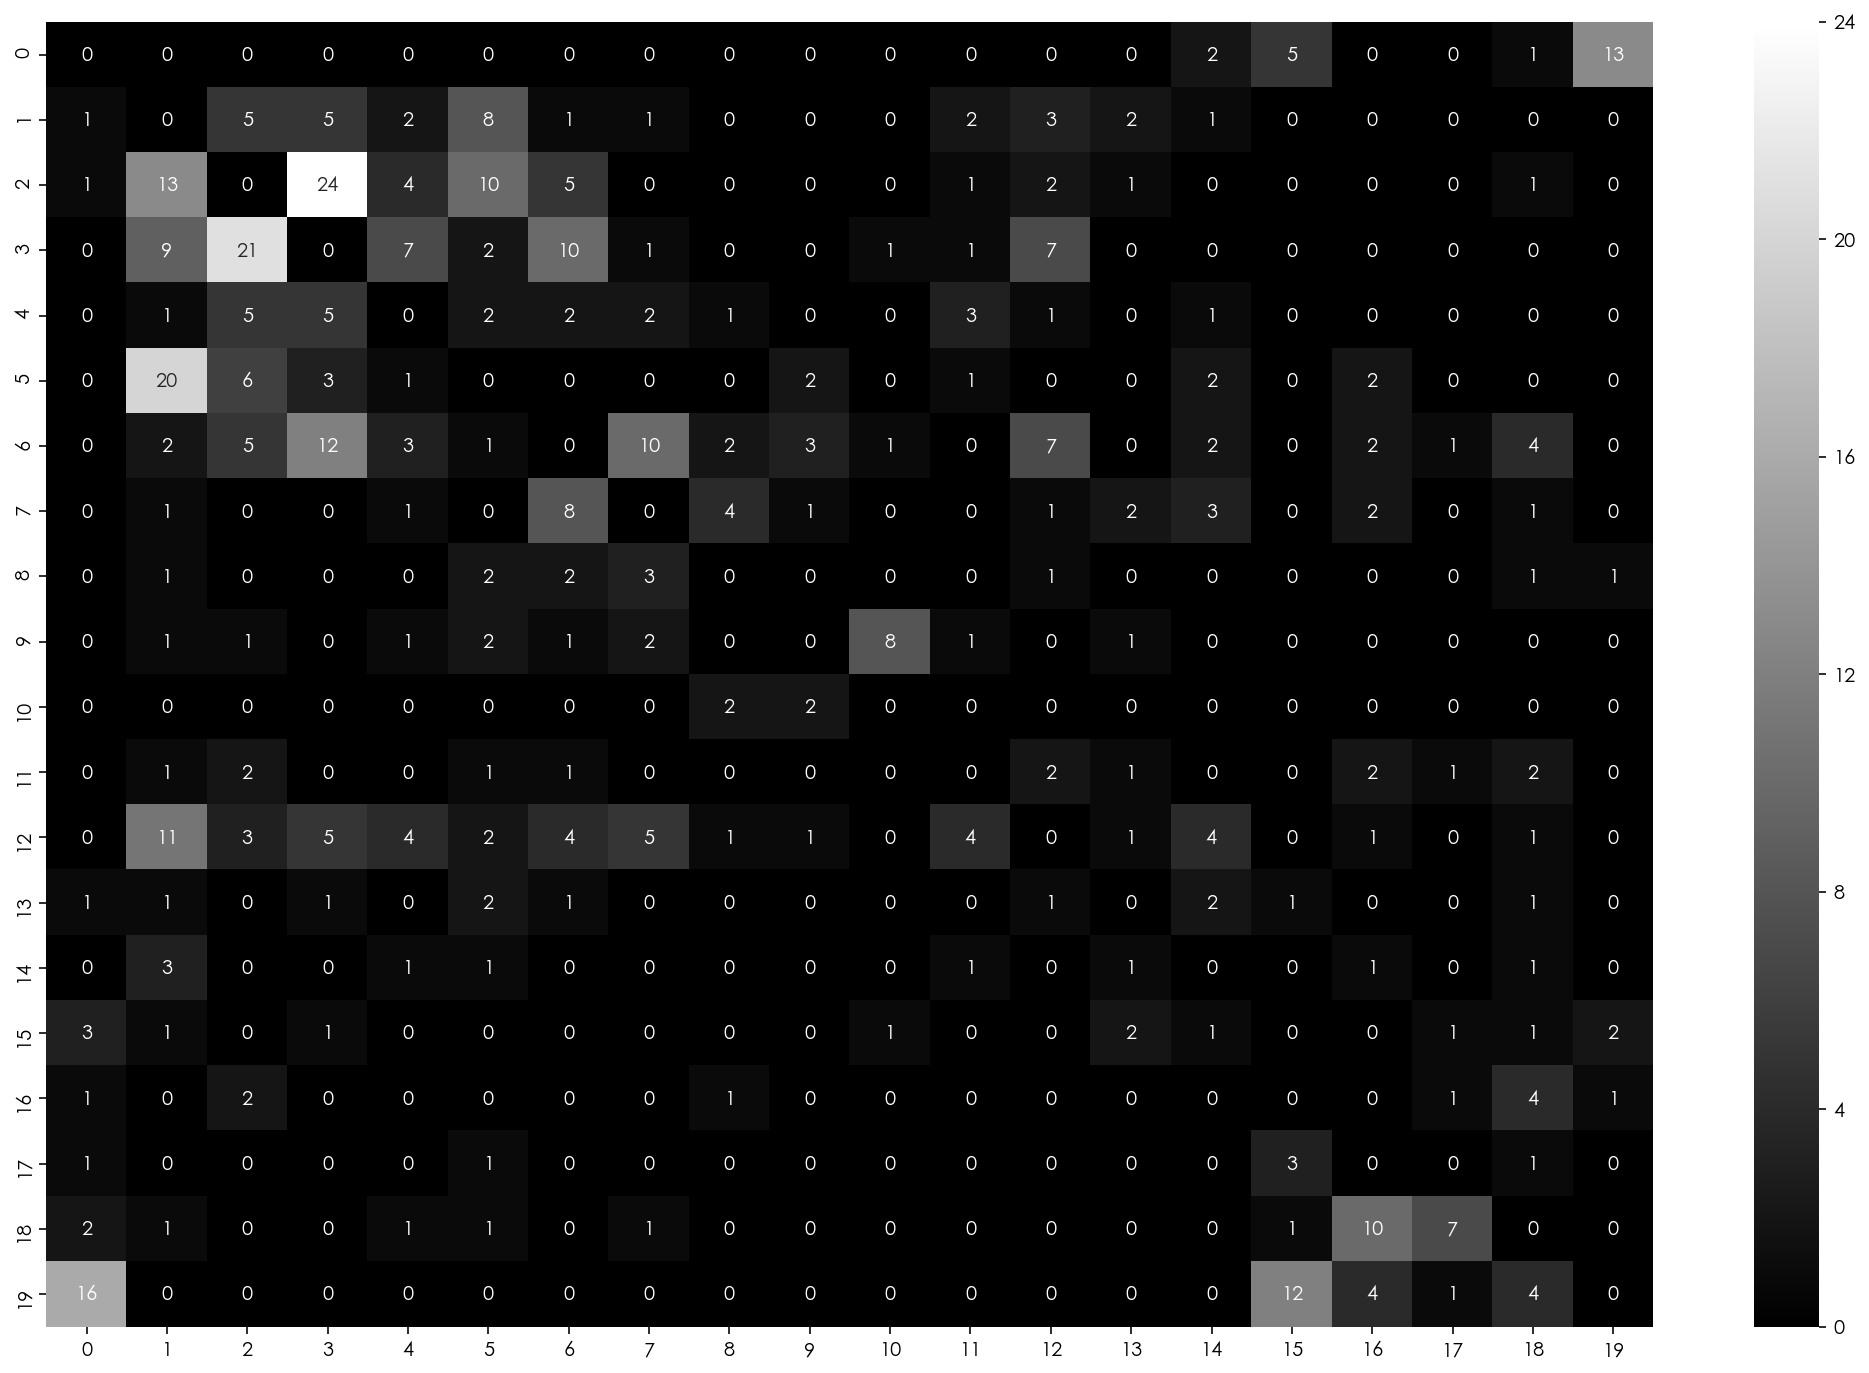

In [34]:
plt.figure(figsize=(18, 12))
sns.heatmap(con_mat, cmap=plt.cm.gray, annot=True, fmt='d')
plt.show()